#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

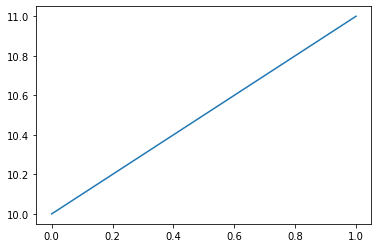

In [103]:
x = np.linspace(0,1,1000)
w0 = 10
w1 = 1.0

y = w0 + w1*x

plt.plot(x,y)
plt.show()

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

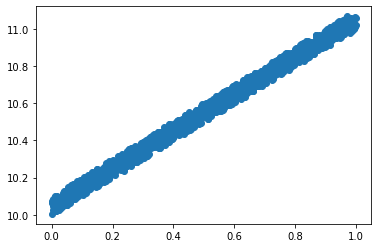

In [104]:
y_rand = np.random.uniform(0,1,(len(y)))
y_cor = y + 0.1*y_rand

plt.scatter(x,y_cor)
plt.show()


**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

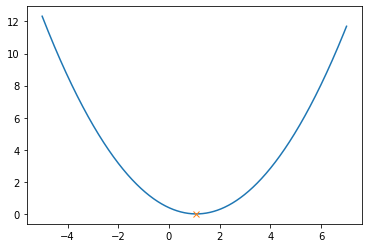

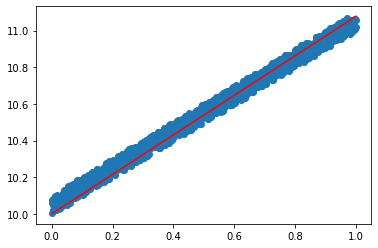

In [105]:

w0 = 10
search_w1 = np.linspace(-5,7,1000)

y_pred = [w0 + i*x for i in search_w1]

error = [ (np.linalg.norm(i - y_cor)**2)/1000 for i in y_pred ]

best = np.argmin(error)

plt.plot(search_w1, error)
plt.plot(search_w1[best],error[best],"x")
plt.show()

plt.scatter(x,y_cor)
plt.plot(x,y_pred[best],'r')
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

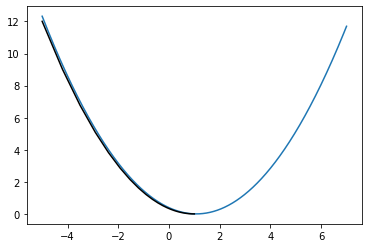

In [106]:
w1=-5
lamb=0.2
err=np.inf
error_array=[]
w_1=[]
while err>0.00000002:
    w_1.append(w1)
    y_pred=w1*x + w0
    err=0.001*np.dot(y-y_pred,y-y_pred)
    error_array.append(err)
    
    w1=w1-lamb*(-0.002*np.dot(y-y_pred,x))

plt.plot(search_w1, error)
plt.plot(w_1,error_array,'000000')


#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

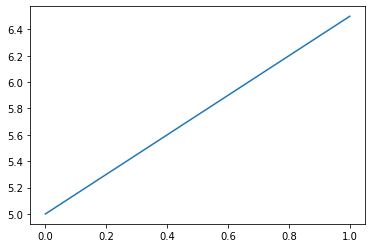

In [107]:
x = np.linspace(0,1,1000)
w0 = 5
w1 = 1.5

y = w0 + w1*x

plt.plot(x,y)
plt.show()


**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

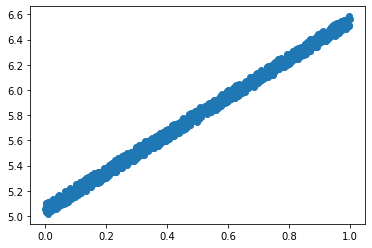

In [108]:
y_rand = np.random.uniform(0,1,(len(y)))
y_cor = y + 0.1*y_rand

plt.scatter(x,y_cor)
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

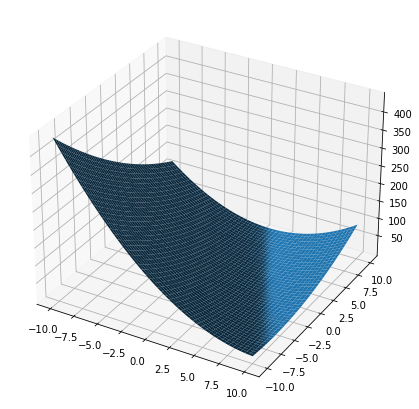

In [109]:
search_w1 = np.linspace(-10,10,1000)
search_w0 = np.linspace(-10,10,1000)

error=[]
for w1 in search_w1:
    temp = []
    for w0 in search_w0:
        y_pred = w1*x+w0
        temp.append(sum((y_cor-y_pred)**2)/1000)
    error.append(temp)

error=np.array(error)

fig = plt.figure(figsize=(16,16))
W0,W1, = np.meshgrid(search_w0,search_w1)
# syntax for 3-D projection
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(W0, W1, error)


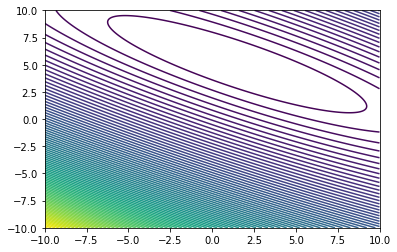

In [110]:
plt.figure()
plt.contour(W1,W0,error,100)

**Gradient Descent to find optimal Values**

In [111]:
def grad_desc(w1,w0,x,y_cor,lr):
    w1_list = [w1]
    w0_list = [w0]
    error = np.inf
    while abs(error)>0.0009:
        y_pred = w1*x + w0
        error = sum((y_cor-y_pred)**2)/1000
        w1 = w1-lr*(-0.002)*(np.dot(y_cor-y_pred,x))
        w0 = w0-lr*(-0.002)*(sum(y_cor-y_pred))
        w1_list.append(w1)
        w0_list.append(w0)
    
    return w1_list,w0_list

w1_list, w0_list = grad_desc(-7.5,-5,x,y_cor,0.7)
print("optimal value of w1 = ",w1_list[-1], "\noptimal value of w0 = ",w0_list[-1])

optimal value of w1 =  1.4730517821126574 
optimal value of w0 =  5.063815452050302


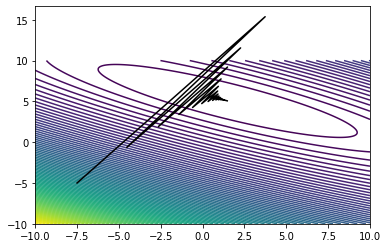

In [112]:
plt.figure()
plt.contour(W1,W0,error,100)
plt.plot(w1_list,w0_list,color="000000")

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

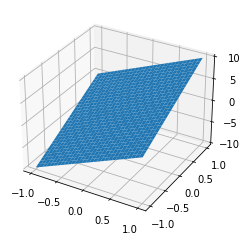

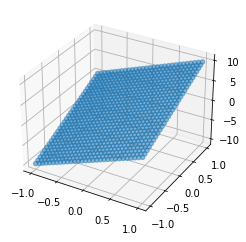

In [113]:
x1 = np.linspace(-1,1,30)
x2 = np.linspace(-1,1,30)

X1, X2 = np.meshgrid(x1, x2)

w0 = 0
w1 = 5
w2 = 5
y = w0 + w1*X1 + w2*X2

figure = plt.figure(figsize=(4,4))
axes = figure.add_subplot(projection='3d')
axes.plot_surface(X1, X2, y)


figure = plt.figure(figsize=(4,4))
axes = figure.add_subplot(projection='3d')
axes.scatter3D(X1, X2, y,alpha=0.5)

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

(30, 30)
(30, 30)


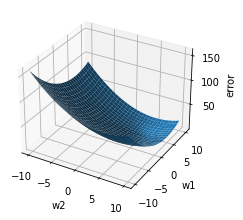

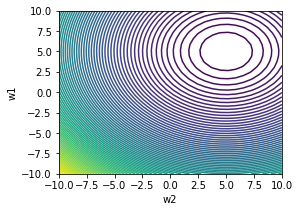

<Figure size 432x288 with 0 Axes>

In [114]:
w1 = np.linspace(-10.0, 10.0, 30)
w2 = np.linspace(-10.0, 10.0, 30)

W1, W2 = np.meshgrid(w1, w2)

def error_2dim(yi,ypred):
    sum = 0
    for i in range(len(yi)):
        for j in range(len(yi[i])):
            sum = sum + (yi[i][j]-ypred[i][j])**2
    return sum/len(yi)**2

error = np.ones((30,30))
for i in range(len(W1)):
    for j in range(len(W1[i])):
        error[i][j] = error_2dim(y,W1[i][j]*X1 + W2[i][j]*X2)

print(W1.shape)
print(W2.shape)

figure = plt.figure(figsize=(4,3))
axes = figure.add_subplot(projection='3d')
axes.plot_surface(W1, W2, error)
axes.set_xlabel('w2')
axes.set_ylabel('w1')
axes.set_zlabel('error',rotation=60)
plt.tight_layout()

plt.figure(figsize=(4,3))
plt.contour(W1, W2, error, 100)
plt.xticks(ticks=np.arange(-10,10.1,2.5))
plt.xlabel('w2')
plt.ylabel('w1')
plt.show()
plt.tight_layout()


**Prediction using Gradient Descent**

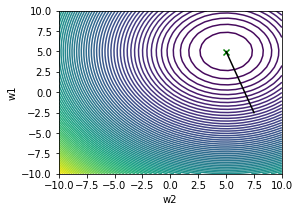

<Figure size 432x288 with 0 Axes>

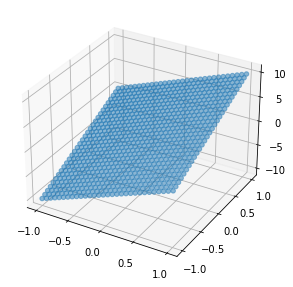

In [115]:
def grad_error(yi,x1,x2,w1,w2):
    sum = 0
    for i in range(len(yi)):
        for j in range(len(yi[i])):
            sum = sum + (yi[i][j] - w1*x1[i][j] - w2*x2[i][j])*x1[i][j]
    # print(sum)
    return -2*sum/len(yi)**2

def grad_desc_2dim(w1_init , w2_init, lr):
    no_of_iterations = 100
    w1_old = w1_init
    w2_old = w2_init
    w1_simul = []
    w2_simul = []
    for i in range(no_of_iterations):
        w1_new = w1_old-lr*grad_error(y,X1,X2,w1_old,w2_old)
        w2_new = w2_old-lr*grad_error(y,X2,X1,w2_old,w1_old)
        w2_simul.append(w2_old)
        w1_simul.append(w1_old)
        w2_old = w2_new
        w1_old = w1_new
        optim_w2 = w2_old
        optim_w1 = w1_old
    return optim_w2 , optim_w1, w2_simul, w1_simul

w1_init = 7.5
w2_init = -2.5

optim_w2 , optim_w1, w2_simul, w1_simul = grad_desc_2dim(w1_init=w1_init,w2_init=w2_init,lr=0.1)

plt.figure(figsize=(4,3))
plt.contour(W1, W2, error, 100)
plt.plot(w1_simul, w2_simul, color='black')
plt.scatter(w1_simul[-1], w2_simul[-1], marker='x', color='green')
plt.xticks(ticks=np.arange(-10,10.1,2.5))
plt.xlabel('w2')
plt.ylabel('w1')
plt.show()
plt.tight_layout()

figure = plt.figure(figsize=(4,4))
axes = figure.add_subplot(projection='3d')
axes.scatter3D(X1, X2, X1*optim_w1 + X2*optim_w2,alpha=0.5)
plt.tight_layout()


#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[2.05028955]
 [3.00046698]
 [3.0022327 ]
 [5.99799468]
 [7.99973769]
 [3.99686746]]
[[2.04546712]
 [3.00068515]
 [3.00171002]
 [5.99854568]
 [7.9997981 ]
 [3.99853174]]


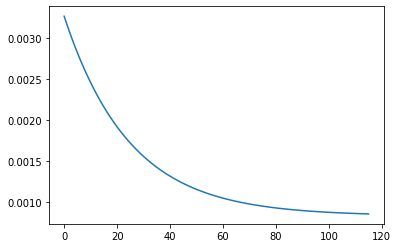

In [128]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    e = y-(x.T@w_old)
    w = w_old + (2*lr/x.shape[1])*(x@e)
    return w

  def error(self,w,y,x):
    err=sum((y-np.matmul(x.T,w))**2)/x.shape[1]
    return err 
    

  def mat_inv(self,y,x_aug):
    w_optim = np.linalg.pinv(x_aug@x_aug.T)@(x_aug@y)
    return w_optim
  # By Gradien descent

  def Regression_grad_des(self,x,y,lr,w):
      err = []
      err_old = 0
      w_pred = w
      for i in range(1000):
          w_pred = self.grad_update(w_pred,lr,y,x)
          temp = self.error(w_pred,y,x)
          err.append(temp)
          dev = np.abs(temp-err_old)
          if dev <= 0.000001:
              break
          err_old = temp
          
      return w_pred,err


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.array([2,3,3,6,8,4]).reshape(sim_dim+1,1)
print(w.shape)

## Augment the Input
x_aug = np.concatenate(([np.ones(sim_no_data)],x),axis=0) ## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print(x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print(y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# By Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr,w)
print(w_pred)

plt.plot(err)


#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [129]:
import pandas as pd
raw_data = pd.read_csv('salary_pred_data.csv')
raw_data.head()


,Level of city,Years of experiance,Age,Level of education,Job profile,Salary
0,2,11,34,4,3,41368
1,4,14,28,1,4,49756
2,1,13,55,3,2,34310
3,4,19,47,1,7,65294
4,2,10,24,2,6,55648


In [130]:
from sklearn.model_selection import train_test_split
y = raw_data['Salary']
x = raw_data.drop(columns=['Salary'])

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.1)

In [153]:
x_aug = np.concatenate(([np.ones(np.shape(x_train)[0])],np.array(x_train).T),axis=0)

reg = regression()
w_opt = reg.mat_inv(y_train,x_aug)
print(w_opt)

# By Gradient descent
lr=0.01
w_pred, err = reg.Regression_grad_des(x_aug,y_train,lr,[2.e+04, 2.e+03, 1.e+02, 2.e+00, 3.e+02, 5.e+03])

y_pred = (np.concatenate(([np.ones(np.shape(x_test)[0])],np.array(x_test).T),axis=0)).T@w_opt
print(w_pred)

[2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
[2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]


In [154]:
from sklearn.metrics import mean_squared_error
print('mean squared error is :',mean_squared_error(y_test,y_pred))

mean squared error is : 2.208773405841557e-19


In [155]:
from sklearn.linear_model import LinearRegression as lin


reg = lin()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

print('optimal weights:', reg.coef_)
print('mean squared error is :',mean_squared_error(y_test,y_pred))


optimal weights: [2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
mean squared error is : 5.413069928547013e-23
